Description

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- MaxHR: Maximum heart rate achieved. Has data type $int64$, numeric value from 60 to 202.
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", message="Your warning message here")


# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset /Machine Learning/heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     46    1   0       120   249    0        0      144      0      0.8   
1     71    0   1       160   302    0        1      162      0      0.4   
2     71    0   1       160   303    0        1      163      0      0.4   
3     71    0   1       160   304    0        1      164      0      0.4   
4     71    0   1       160   305    0        1      165      0      0.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
881   68    0   2       120   211    0        0      115      0      1.5   
882   44    0   2       108   141    0        1      175      0      0.6   
883   52    1   0       128   255    0        1      161      1      0.0   
884   59    1   3       160   273    0        0      125      0      0.0   
885   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   0     3       0  
1        2   2     2       1  
2        2   2     2       1  
3        2   2     2       1  
4        2   2     2       1  
..     ...  ..   ...     ...  
881      1   0     2       1  
882      1   0     2       1  
883      2   1     3       0  
884      2   0     2       0  
885      1   1     3       0  

[886 rows x 14 columns]

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


Seem likes Dataset doesn't have any missing value

In [ ]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    54.007901    0.683973    1.005643  132.117381  247.497743    0.168172   
std      9.126292    0.465186    1.024542   16.807511   47.209995    0.374230   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  212.000000    0.000000   
50%     54.000000    1.000000    1.000000  130.000000  245.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.495485  149.492099    0.310384    1.083296    1.424379    0.714447   
std      0.526669   23.921327    0.462912    1.147935    0.556861    1.028825   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    1.000000    0.000000   
50%      0.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.800000    2.000000    1.000000   
max      2.000000  206.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  886.000000  886.000000  
mean     2.278781    0.564334  
std      0.572576    0.496124  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

There some outlier like trestbps, chol (min is far from Q1, max for from Q3)

Even df.info() show that features are numerical but some features have less unique value 0, 1(like it already encoded), maybe its origin is category

Let see how does pandas profile tools handle these features

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(
    df, title="Pandas Profiling Report dataset"
)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

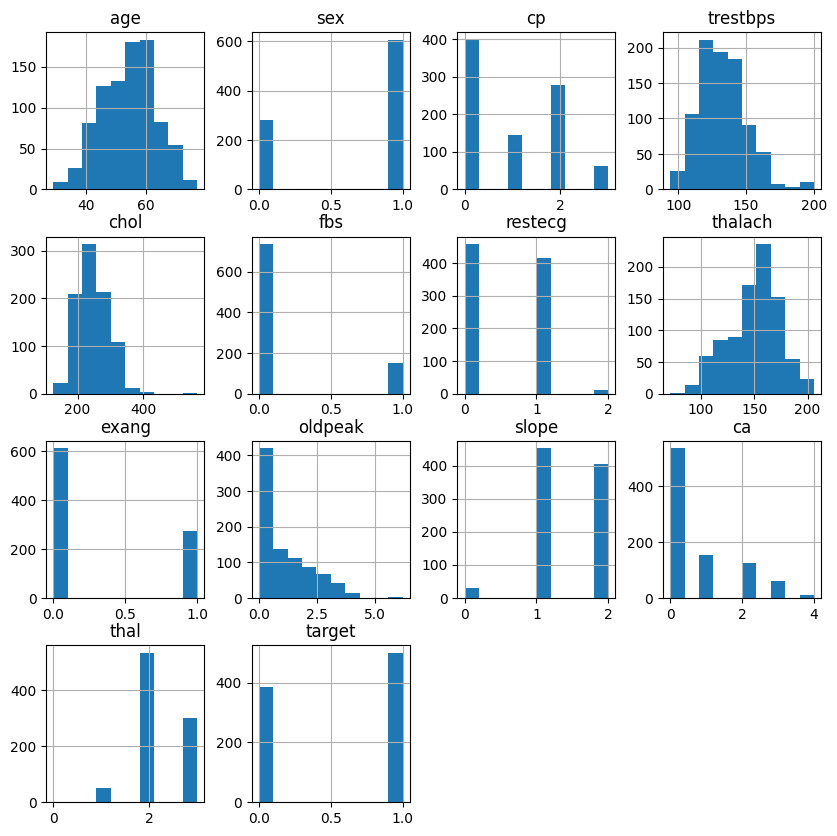

In [ ]:
df.hist(figsize = (10,10))

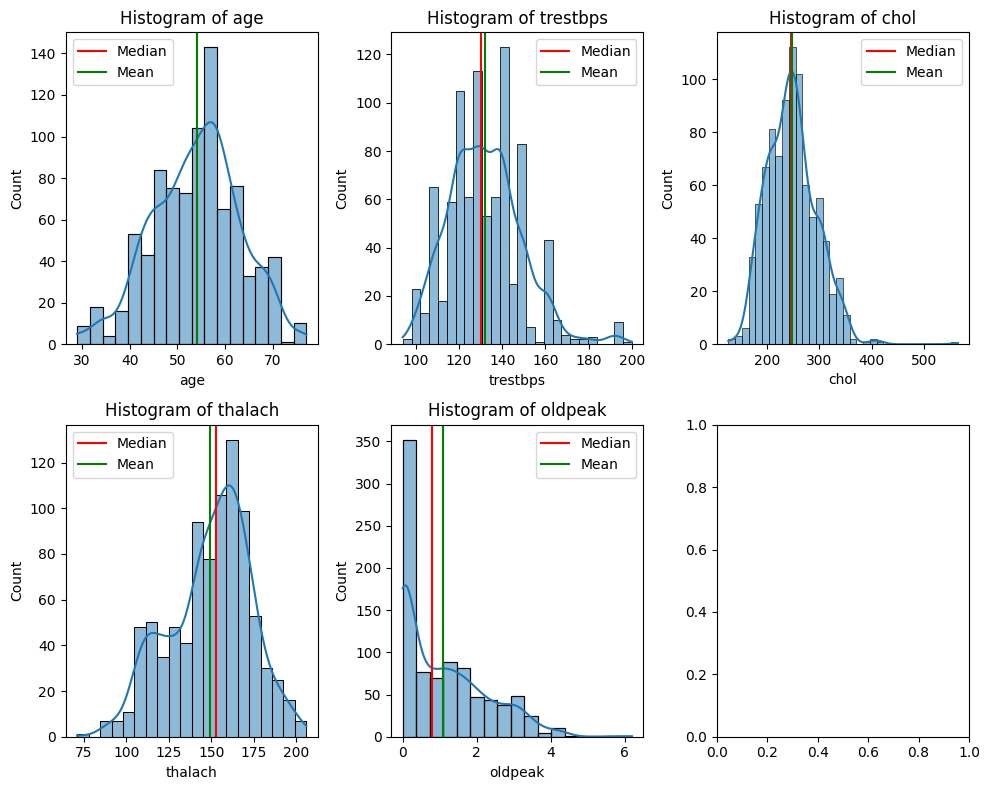

In [ ]:
numer = np.array([['age', 'trestbps', 'chol'], ['thalach', 'oldpeak', '']])\
# In description there is MaxHR is numeric but I dont see it in dataset
fig, ax = plt.subplots(2, 3, figsize = (10, 8))

for i in range(numer.shape[0]):
    for j in range(numer.shape[1]):
        if numer[i, j] == '':
            continue
        sns.histplot(data = df, x = numer[i, j], ax = ax[i, j], kde = True)
        ax[i, j].set_title('Histogram of ' + numer[i,j])
        ax[i, j].axvline(x = df[numer[i, j]].median(), color = 'red', label = 'Median')
        ax[i, j].axvline(x = df[numer[i, j]].mean(), color = 'green', label = 'Mean')
        ax[i, j].legend()

plt.tight_layout()
plt.show()

Distribution of Age feature is kinda normal. Nevertheless, thalach is a little skew left and others is skew right (especially old peak)

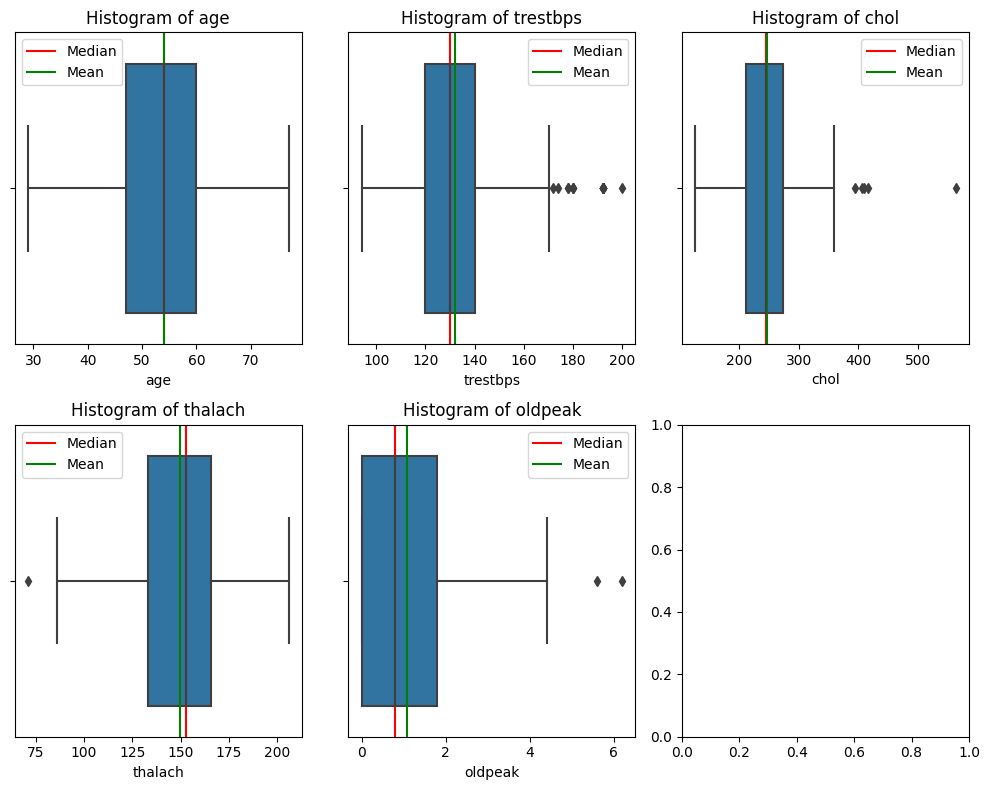

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (10, 8))

for i in range(numer.shape[0]):
    for j in range(numer.shape[1]):
        if numer[i, j] == '':
            continue
        sns.boxplot(data = df, x = numer[i, j], ax = ax[i, j])
        ax[i, j].set_title('Histogram of ' + numer[i,j])
        ax[i, j].axvline(x = df[numer[i, j]].median(), color = 'red', label = 'Median')
        ax[i, j].axvline(x = df[numer[i, j]].mean(), color = 'green', label = 'Mean')
        ax[i, j].legend()

plt.tight_layout()
plt.show()

Even Data have outliers but its not much, I will figure out do these outliers effect performance of model later

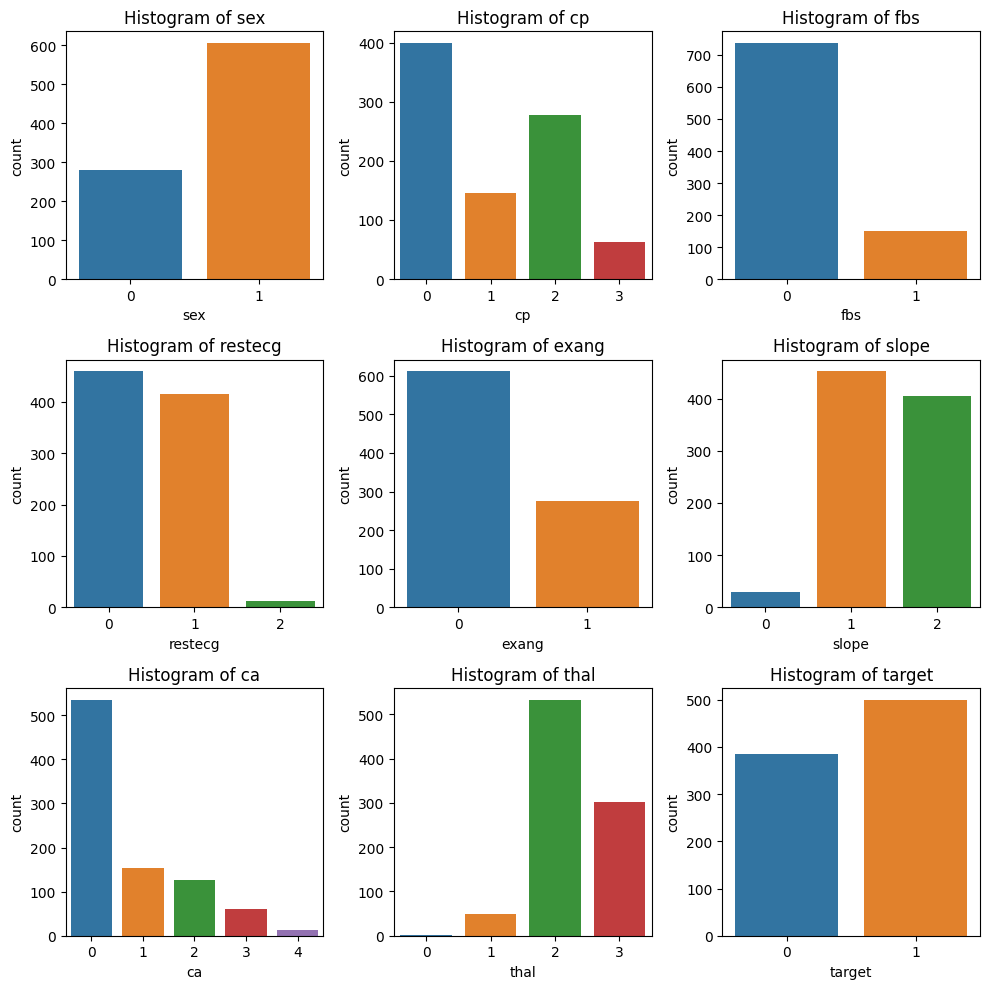

In [ ]:
cate = np.array([['sex', 'cp', 'fbs'], ['restecg', 'exang', 'slope'], ['ca', 'thal', 'target']])
fig, ax = plt.subplots(3, 3, figsize = (10,10))

for i in range(cate.shape[0]):
    for j in range(cate.shape[1]):
        sns.countplot(data = df, x = cate[i,j], ax = ax[i, j])
        ax[i, j].set_title('Histogram of ' + cate[i,j])

plt.tight_layout()
plt.show()

Some of values in some categories is very small (like 0 in thal, 2 in restecg, 4 in ca, ...) maybe we can keep it in data train without erase it

Let see how do features of data correlate Target

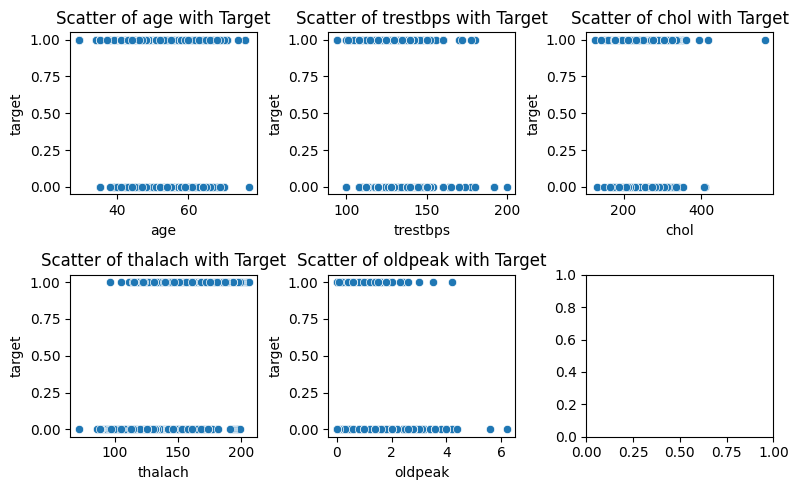

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (8, 5))

for i in range(numer.shape[0]):
    for j in range(numer.shape[1]):
        if numer[i, j] == '':
            continue
        sns.scatterplot(data = df, x = numer[i, j], y = 'target', ax = ax[i, j])
        ax[i, j].set_title('Scatter of ' + numer[i,j] + ' with Target')

plt.tight_layout()
plt.show()

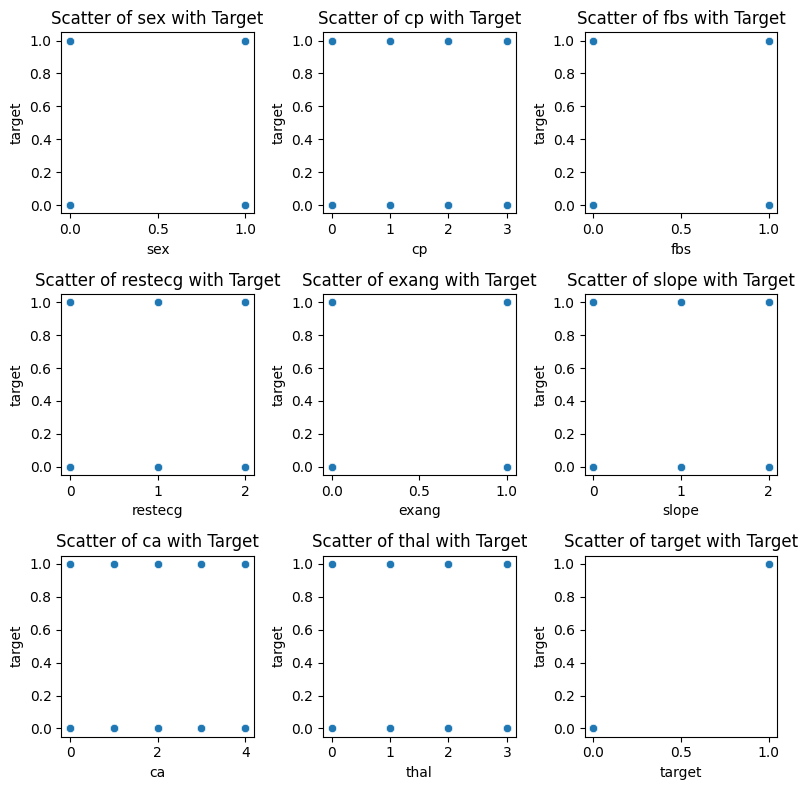

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (8, 8))

for i in range(cate.shape[0]):
    for j in range(cate.shape[1]):
        sns.scatterplot(data = df, x = cate[i,j], y = 'target', ax = ax[i, j])
        ax[i, j].set_title('Scatter of ' + cate[i,j] + ' with Target')

plt.tight_layout()
plt.show()

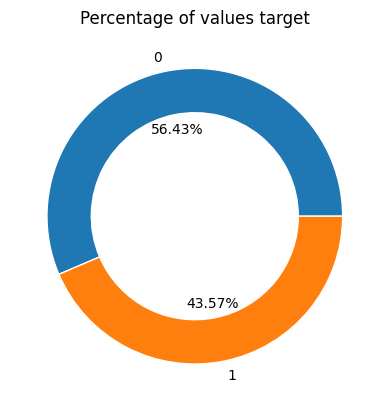

In [ ]:
data_pie = df['target'].value_counts()
label_pie = labels=df['target'].unique()
plt.pie(x = data_pie, labels = label_pie, autopct='%.2f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title('Percentage of values target')
plt.show()

Seem likes target is kinda fine, its not much imblanced so we can use metrics like accuracy to evaluate it, but just take all metrics how do they perform


<Axes: >

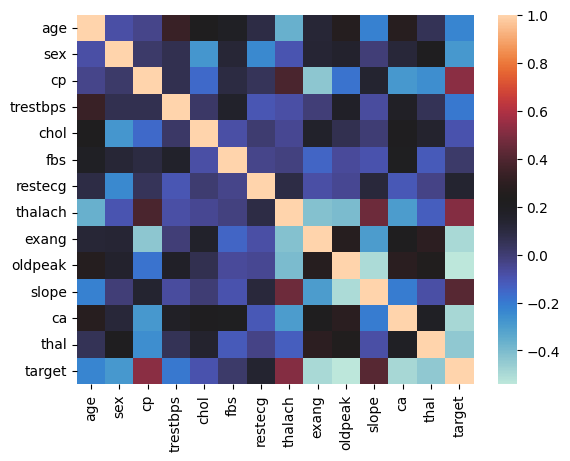

In [ ]:
sns.heatmap(df.corr(), cmap = 'icefire')

Overall, ca and thal features are low correlation with others features and they have no correlation between them. Furthermore, most of features have correlation (~ 0.5) with target except restecg

# Feature Engineering

In [4]:
preprocess_df = df.copy()

## Feature Selection

According to above heatmap, these 2 categories almost have no correlation with others, so we can drop it if we want, cause it not affect performance =)))

But If you drop it, pay attention to features are going to be encoded in the next section

In [ ]:
# preprocess_df = preprocess_df.drop(['restecg','fbs'], axis = 1)

## Encoding

Lets get back description of categorical data
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

We just skip target and ca (I dont know what is it =))) and thal dont have description

Nominal Categories are: Sex, FastingBS (1 and 0 is mode of high BS or not, its not a level), ExerciseAngina, ST_Slope

Ordinal Category: ChestPainType. 

Cause ChestPainType already encoded by label so Im going to One-Hot Encoding Nominal categories

In [5]:
preprocess_df = pd.get_dummies(df, prefix = ['sex','fbs','restecg','exang','slope'], columns = ['sex','fbs','restecg','exang','slope'])
preprocess_df

age  cp  trestbps  chol  thalach  oldpeak  ca  thal  target  sex_0  ...  \
0     46   0       120   249      144      0.8   0     3       0      0  ...   
1     71   1       160   302      162      0.4   2     2       1      1  ...   
2     71   1       160   303      163      0.4   2     2       1      1  ...   
3     71   1       160   304      164      0.4   2     2       1      1  ...   
4     71   1       160   305      165      0.4   2     2       1      1  ...   
..   ...  ..       ...   ...      ...      ...  ..   ...     ...    ...  ...   
881   68   2       120   211      115      1.5   0     2       1      1  ...   
882   44   2       108   141      175      0.6   0     2       1      1  ...   
883   52   0       128   255      161      0.0   1     3       0      0  ...   
884   59   3       160   273      125      0.0   0     2       0      0  ...   
885   54   0       120   188      113      1.4   1     3       0      0  ...   

     fbs_0  fbs_1  restecg_0  restecg_1  restecg_2  exang_0  exang_1  slope_0  \
0        1      0          1          0          0        1        0        0   
1        1      0          0          1          0        1        0        0   
2        1      0          0          1          0        1        0        0   
3        1      0          0          1          0        1        0        0   
4        1      0          0          1          0        1        0        0   
..     ...    ...        ...        ...        ...      ...      ...      ...   
881      1      0          1          0          0        1        0        0   
882      1      0          0          1          0        1        0        0   
883      1      0          0          1          0        0        1        0   
884      1      0          1          0          0        1        0        0   
885      1      0          0          1          0        1        0        0   

     slope_1  slope_2  
0          0        1  
1          0        1  
2          0        1  
3          0        1  
4          0        1  
..       ...      ...  
881        1        0  
882        1        0  
883        0        1  
884        0        1  
885        1        0  

[886 rows x 21 columns]

## Handling outlier

Cause outliers is not much in data so I prefer to remove outlier to imputate outlier (I tested imputation, its doesnt improve performance)

In [6]:
def remove_outlier(data, feature, lower_bound, upper_bound):
    Q1 = data[feature].quantile(lower_bound) # or Q1 = np.percentile(df['column'], 0.25)
    Q3 = data[feature].quantile(upper_bound)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5*IQR
    upper_extreme = Q3 + 1.5*IQR

    outliers = data[(data[feature] < lower_extreme) | (data[feature] > upper_extreme)]
    percent_outliers = len(outliers) / len(data) * 100
    print('Percent of outlier in',feature,':',percent_outliers)

    data = data.drop(outliers.index)

    return data

In [7]:
# preprocess_df = remove_outlier(preprocess_df, 'trestbps', 0.25, 0.75)

preprocess_df = remove_outlier(preprocess_df, 'chol', 0.05, 0.95)

Percent of outlier in chol : 0.1128668171557562


## Handling Imbalanced data with SMOTE

In [ ]:
print(preprocess_df.target.value_counts()[0] / preprocess_df['target'].value_counts()[1])
preprocess_df.shape, preprocess_df['target'].value_counts()

0.772


((886, 21),
 1    500
 0    386
 Name: target, dtype: int64)

In [ ]:
# from imblearn.over_sampling import SMOTE
# # Resampling the minority class. The strategy can be changed as required.
# sm = SMOTE(sampling_strategy='minority', random_state=42)
# # Fit the model to generate the data.
# oversampled_X, oversampled_Y = sm.fit_resample(preprocess_df.drop('target', axis=1), preprocess_df['target'])
# oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

# preprocess_df = oversampled.copy()

I have experimented both undersampling and oversampling (use oversampling and SMOTE) and saw that undersampling is make performance model higher for training set but lower for test set. On the other hand, oversampling still have the same performance with no resampling data cause dataset is already small so undersampling is not a good choice. Besides, target data is not much imbalanced (56% target 0 and 44% target 1) so this feature engineering is not necessary, just for experiment =))

## Correlation

<Axes: >

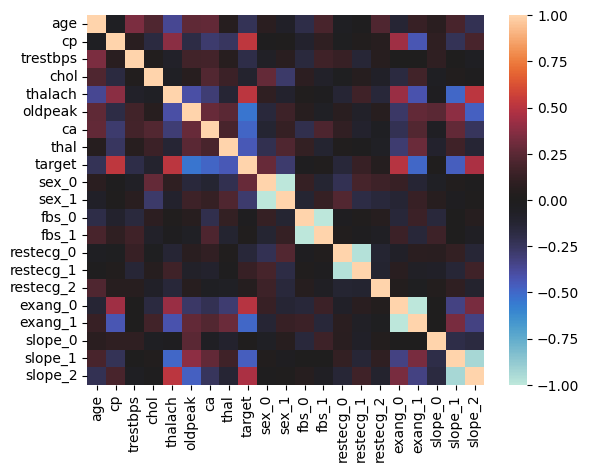

In [ ]:
sns.heatmap(preprocess_df.corr(), cmap = 'icefire')

## Split data

In [8]:
X = preprocess_df.drop(['target'], axis = 1)
Y = preprocess_df['target']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((708, 20), (177, 20), (708,), (177,))

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

# Apply machine learning model

## Build SK-learn model

Tham số ``fit_intercept`` xác định việc thêm hằng số $a_0$ (bias) vào hàm Logistic Regression.
- ``fit_intercept = True``: hàm Logistic Regression có dạng
\begin{equation*}
p = \frac{1}{1+e^{a_0+a_1x}}
\end{equation*}
- ``fit_intercept = False``: hàm Logistic Regression có dạng
\begin{equation*}
p = \frac{1}{1+e^{a_1x}}
\end{equation*}


we can change training and test set by take 90%, evaluate training set still around 96% but evaluate test set is 98%. Just a experiement, I dont recommend this cause test set with 10% is too small and it doesnt make sense for evaluating model

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
                        confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

def build_model(X, Y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = LogisticRegression(penalty = 'l2', solver = 'liblinear', random_state = 42)
    # Todo: fit your model with X, y
    model.fit(X, Y)
    return model

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))
    print("ROC_AUC ", roc_auc_score(y_true, y_pred))

    report = classification_report(y_true, y_pred)
    print("Classification Report\n",report)

    cm = confusion_matrix(y_true,y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Heart Disease','Heart Disease'])
    cm_display.plot()
    plt.show()
    
    compare_df = pd.DataFrame({'Actual': y_true, 'Predict': y_pred})
    print(compare_df)
    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true, y_pred)
    return main_score

model = build_model(X_train, Y_train)

precision 0.9404466501240695
recall 0.9668367346938775
accuracy 0.9477401129943502
F1 0.9534591194968554
ROC_AUC  0.945443683802635
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       316
           1       0.94      0.97      0.95       392

    accuracy                           0.95       708
   macro avg       0.95      0.95      0.95       708
weighted avg       0.95      0.95      0.95       708



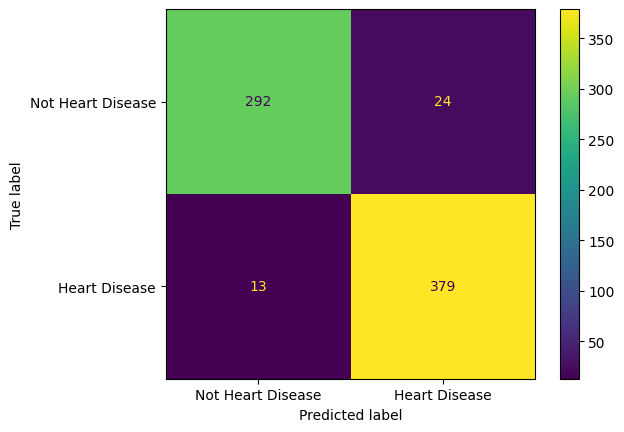

     Actual  Predict
404       0        0
434       0        0
360       1        1
355       1        1
81        1        1
..      ...      ...
106       1        1
270       1        1
861       1        1
435       0        0
102       1        1

[708 rows x 2 columns]


0.9534591194968554

In [11]:
pred = model.predict(X_train)
calculate_performance(Y_train, pred)

precision 0.9811320754716981
recall 0.9719626168224299
accuracy 0.9717514124293786
F1 0.9765258215962441
ROC_AUC  0.9716955941255008
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        70
           1       0.98      0.97      0.98       107

    accuracy                           0.97       177
   macro avg       0.97      0.97      0.97       177
weighted avg       0.97      0.97      0.97       177



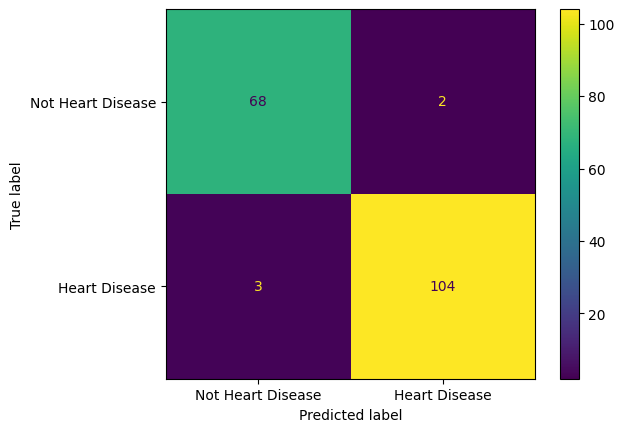

     Actual  Predict
44        1        1
388       0        0
703       0        0
643       0        0
881       1        1
..      ...      ...
118       1        1
807       1        1
545       0        0
29        1        1
247       1        1

[177 rows x 2 columns]


0.9765258215962441

In [12]:
pred = model.predict(X_test)
calculate_performance(Y_test, pred)

## Tuning threshold

In [ ]:
# Predict probabilities for the test set
probs = model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1, 0.01)
optimal_threshold = 0
optimal_f1 = 0

for threshold in thresholds:
    # Convert predicted probabilities to predicted labels using the threshold
    pred = np.where(probs > threshold, 1, 0)
    f1 = f1_score(Y_test, pred)
    if f1 > optimal_f1:
        optimal_threshold = threshold
        optimal_f1 = f1

print("Optimal threshold:", optimal_threshold)
print("F1 score:", optimal_f1)

Optimal threshold: 0.4099999999999998
F1 score: 0.9719626168224299


# Conclusion

elasticnet penalty is not fit data train, its announce TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

Solver: Saga ~84%, Sag ~86%, and others are good >= 95%: lbfgs < liblinear ~ newton-cg ~ newton-cholesky

1. Saga and Sag not good enough because the data training is small, its compatible with liblinear solver
2. newton-cholesky is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories compatible with our dataset
3. newton-cg  can be faster than newton-cholesky for large datasets but may not be as accurate.

Theoretically, newton-cholesky seem to be the best solver for this dataset. But based on performance I got =)), I choose liblinear solver and l2 penalty even among of them not different much

According to above Confusion Matrix we have
*   Heart Disease is 1 as Negative
*   Not Heart Disease is 0 as Positive

Here are my point:

1.   If we assumed this Dataset is kinda balanced (cause its not much imbalanced) so Accuracy can use as main metric
2.   If Its not balanced and we need to define all sample classifed Positive (TP + FP) so Precision is main metrics. Cause we don't want to misleading that we predicted we have not Heart Disease but we actually have, people can die for that =))
3.   If we care about cost of healthcare but its wasteful to use it cause we dont any Heart Disease (TP + FN), Recall can be considered. Nevertheless, point 2. is more important than this so both have to be considered. So, F1 score is the harmonic mean of Precision and Recall, It is the main metric

Finally, I choose Precision as main metric but if dataset is more Imbalacned, I will chose F1 score


